# Load the tests to compare

In [3]:
%matplotlib inline
import os
import sys
import json
import pickle
import pandas as pd

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TESTS_RESULTS_PATH
series = 22
start_test = 0
end_test = 18
tests_ids = [i for i in range(start_test, end_test)]
tests_names = [i for i in range(start_test, end_test)]

tests = {}


for test_id, test_name in zip(tests_ids, tests_names):
    test_path = os.path.join(
        TESTS_RESULTS_PATH,
        'series',
        str(series),
        'tests',
        str(test_id))
    with open(os.path.join(test_path, 'info.json')) as cf:
        info = json.loads(cf.read())
    with open(os.path.join(test_path, 'episodes.pickle'), 'rb') as input_file:
        episodes = pickle.load(input_file)
    tests.update({test_name: {
        'info': info,
        'episodes': episodes
    }})
test_types = [test['info']['algorithm'] for _, test in tests.items()]
print("availeble tests:\n {}\ntests_types:\n {}".format(
    list(tests.keys()),
    test_types))

availeble tests:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
tests_types:
 ['DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN', 'DQN']


# All Stats of a test

In [4]:
test_id = 0
episdoe_id = 0
print(f'tests entry structure:\n{tests[test_id].keys()}')
print(f"tests entry info structure:\n{tests[test_id]['info'].keys()}")
print(f"tests entry episodes info:\n{tests[test_id]['episodes'][episdoe_id].columns}")

tests entry structure:
dict_keys(['info', 'episodes'])
tests entry info structure:
dict_keys(['type_env', 'series', 'cluster_id', 'workload_id', 'workload_id_test', 'checkpoint', 'experiment_str', 'experiments', 'episode_length', 'num_episodes', 'algorithm', 'penalty_consolidated', 'num_workers'])
tests entry episodes info:
Index(['action', 'raw_obs', 'num_consolidated', 'num_overloaded',
       'scheduling_timestep', 'scheduling_success', 'reward_illegal',
       'reward_u', 'reward_c', 'reward_cv', 'reward_v', 'reward_g', 'reward_p',
       'u', 'c', 'cv', 'v', 'g', 'p', 'reward'],
      dtype='object')


# Extracting necessary stats of all tests

In [5]:
final_stats = []
for test_id in range(start_test, end_test):
    # TODO check for correctness
    num_consolidated_episodes_average = [episode['num_consolidated'].mean() for episode in tests[test_id]['episodes']]
    num_consolidated_test_average = sum(num_consolidated_episodes_average) / len(num_consolidated_episodes_average)

    num_overloaded_episodes_average = [episode['num_overloaded'].mean() for episode in tests[test_id]['episodes']]
    num_overloaded_test_average = sum(num_overloaded_episodes_average) / len(num_overloaded_episodes_average)

    scheduling_success_episodes_average = [episode['scheduling_success'].mean() for episode in tests[test_id]['episodes']]
    scheduling_success_test_average = sum(scheduling_success_episodes_average) / len(scheduling_success_episodes_average)

    reward_illegal_episodes_average = [episode['reward_illegal'].mean() for episode in tests[test_id]['episodes']]
    reward_illegal_test_average = sum(reward_illegal_episodes_average) / len(reward_illegal_episodes_average)

    reward_u_episodes_average = [episode['reward_u'].mean() for episode in tests[test_id]['episodes']]
    reward_u_test_average = sum(reward_u_episodes_average) / len(reward_u_episodes_average)

    reward_c_episodes_average = [episode['reward_c'].mean() for episode in tests[test_id]['episodes']]
    reward_c_test_average = sum(reward_c_episodes_average) / len(reward_c_episodes_average)

    reward_c_episodes_average = [episode['reward_cv'].mean() for episode in tests[test_id]['episodes']]
    reward_c_test_average = sum(reward_c_episodes_average) / len(reward_c_episodes_average)

    reward_v_episodes_average = [episode['reward_v'].mean() for episode in tests[test_id]['episodes']]
    reward_v_test_average = sum(reward_v_episodes_average) / len(reward_v_episodes_average)

    reward_g_episodes_average = [episode['reward_g'].mean() for episode in tests[test_id]['episodes']]
    reward_g_test_average = sum(reward_g_episodes_average) / len(reward_g_episodes_average)

    reward_p_episodes_average = [episode['reward_p'].mean() for episode in tests[test_id]['episodes']]
    reward_p_test_average = sum(reward_p_episodes_average) / len(reward_p_episodes_average)

    cv_episodes_average = [episode['cv'].mean() for episode in tests[test_id]['episodes']]
    cv_test_average = sum(cv_episodes_average) / len(cv_episodes_average)

    reward_episodes_average = [episode['reward'].mean() for episode in tests[test_id]['episodes']]
    reward_test_average = sum(reward_episodes_average) / len(reward_episodes_average)


    final_stats.append({
        'test_id': test_id,
        'checkpoint': tests[test_id]['info']['checkpoint'],
        # TODO where is workload id
        'cluster_id': tests[test_id]['info']['cluster_id'],
        'workload_id': tests[test_id]['info']['workload_id'],
        'workload_id_test': tests[test_id]['info']['workload_id_test'],
        'experiments': tests[test_id]['info']['experiments'],
        'episode_length': tests[test_id]['info']['episode_length'],
        'num_episodes': tests[test_id]['info']['num_episodes'],
        'penalalty_consolidated': tests[test_id]['info']['penalty_consolidated'],
        'consolidated': num_consolidated_test_average,
        'scheduling_success_test_average': scheduling_success_test_average,
        'reward_g_test_average': reward_g_test_average,
        'reward_u_test_average': reward_u_test_average,
        'variance': cv_test_average
    })

final_stats_df = pd.DataFrame(final_stats)
final_stats_df['test_types'] = test_types
# final_stats_df.loc[df['penalalty_consolidated']]

# TODO add the following information to the table (from the info.json file)
# - penatly_latency
# - penalty_conslidation

In [6]:
test_id = 2
tests[test_id]['info']

{'type_env': 'sim-scheduler',
 'series': 121,
 'cluster_id': 18,
 'workload_id': 0,
 'workload_id_test': 3,
 'checkpoint': 300,
 'experiment_str': 'DQN_SimSchedulerEnv_4b07c_00000_0_2023-02-16_22-57-31',
 'experiments': 2,
 'episode_length': 1000,
 'num_episodes': 5,
 'algorithm': 'DQN',
 'penalty_consolidated': 1,
 'num_workers': 4}

# compare tests - tables

In [7]:
final_stats_df = final_stats_df.sort_values(by=['test_types', 'test_id', 'experiments']).reset_index(drop=True)


# compare tests - plots

In [8]:
selected = final_stats_df[(final_stats_df['cluster_id'] == 17) | (final_stats_df['cluster_id'] == 21) | (final_stats_df['cluster_id'] == 22)].sort_values(by=['cluster_id', 'consolidated'])
selected.loc[selected['cluster_id'] == 21, 'cluster_id'] = 6
selected.loc[selected['cluster_id'] == 17, 'cluster_id'] = 8
selected.loc[selected['cluster_id'] == 22, 'cluster_id'] = 10
selected = selected.sort_values(by=['cluster_id'])
# selected.loc[selected['experiments'] == 0, 'cluster_id'] = 'Consolidation'
# selected.loc[selected['experiments'] == 1, 'cluster_id'] = 'Fairness'
# selected.loc[selected['experiments'] == 2, 'cluster_id'] = 'Balance'
selected

,test_id,checkpoint,cluster_id,workload_id,workload_id_test,experiments,episode_length,num_episodes,penalalty_consolidated,consolidated,scheduling_success_test_average,reward_g_test_average,reward_u_test_average,variance,test_types
13,13,300,6,0,3,1,1000,5,0.00,0.6172,0.1756,0.327345,4.228089e+26,7.448921e+50,DQN
14,14,300,6,0,3,2,1000,5,0.75,1.6734,0.1554,0.300418,3.706243e+26,6.211699e+50,DQN
12,12,300,6,0,3,0,1000,5,1.00,3.5976,0.1168,0.244855,3.056775e+26,6.533025e+50,DQN
4,4,300,8,0,3,1,1000,5,0.00,2.0116,0.1858,0.358916,4.207320e+26,5.259708e+50,DQN
5,5,300,8,0,3,2,1000,5,0.75,3.8446,0.1552,0.316682,3.741439e+26,5.513594e+50,DQN
3,3,300,8,0,3,0,1000,5,1.00,5.5740,0.1332,0.291623,3.244145e+26,5.209433e+50,DQN
16,16,300,10,0,3,1,1000,5,0.00,2.1500,0.1872,0.361200,1.453957e+22,3.102819e+43,DQN
17,17,300,10,0,3,2,1000,5,0.75,5.6730,0.1376,0.301863,1.452504e+22,3.102816e+43,DQN
15,15,300,10,0,3,0,1000,5,1.00,8.3926,0.0908,0.238982,6.271024e+18,1.330946e+37,DQN


In [47]:
df_cons_plot = pd.DataFrame([], columns=['# nodes', 'Fairness', 'Balance', 'Consolidation'])
to_append = pd.DataFrame({'# nodes': [6], 'Fairness': [0.61], 'Balance': [1.67], 'Consolidation': [3.59]})
df_cons_plot = df_cons_plot.append(to_append)
to_append = pd.DataFrame({'# nodes': [8], 'Fairness': [2], 'Balance': [3.8], 'Consolidation': [5.5]})
df_cons_plot = df_cons_plot.append(to_append)
to_append = pd.DataFrame({'# nodes': [10], 'Fairness': [2.1], 'Balance': [5.6], 'Consolidation': [8.3]})
df_cons_plot = df_cons_plot.append(to_append)

df_cons_plot.set_index('# nodes', inplace=True)

df_cons_plot

,Fairness,Balance,Consolidation
# nodes,,,
6,0.61,1.67,3.59
8,2.00,3.80,5.50
10,2.10,5.60,8.30


<Figure size 432x288 with 0 Axes>

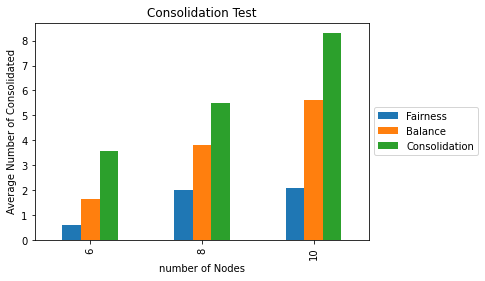

In [ ]:
# selected.plot(x='cluster_id', y='reward_g_test_average', kind='bar')
import matplotlib.pyplot as plt
plt.tight_layout()
df_cons_plot.plot(kind='bar')
plt.title("Consolidation Test")
plt.xlabel("number of Nodes")
plt.ylabel("Average Number of Consolidated")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('test-average-consolidation.pdf', bbox_inches='tight')
# plt.show()

In [ ]:
df_g_plog = pd.DataFrame([], columns=['# nodes', 'Fairness', 'Balance', 'Consolidation'])
to_append = pd.DataFrame({'# nodes': [6], 'Fairness': [0.32], 'Balance': [0.30], 'Consolidation': [0.24]})
df_g_plog = df_g_plog.append(to_append)
to_append = pd.DataFrame({'# nodes': [8], 'Fairness': [0.36], 'Balance': [0.32], 'Consolidation': [0.29]})
df_g_plog = df_g_plog.append(to_append)
to_append = pd.DataFrame({'# nodes': [10], 'Fairness': [0.36], 'Balance': [0.30], 'Consolidation': [0.23]})
df_g_plog = df_g_plog.append(to_append)

df_g_plog.set_index('# nodes', inplace=True)

df_g_plog

,Fairness,Balance,Consolidation
# nodes,,,
6,0.32,0.30,0.24
8,0.36,0.32,0.29
10,0.36,0.30,0.23


<Figure size 432x288 with 0 Axes>

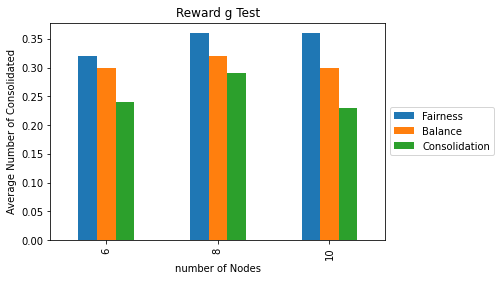

In [53]:
# selected.plot(x='cluster_id', y='reward_g_test_average', kind='bar')
import matplotlib.pyplot as plt
plt.tight_layout()
df_g_plog.plot(kind='bar')
plt.title("Reward g Test")
plt.xlabel("number of Nodes")
plt.ylabel("Average Number of Consolidated")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('test-average-g.pdf', bbox_inches='tight')
# plt.show()